In [30]:
import xarray as xr
import numpy as np
import pandas as pd

In [31]:
era5_data = xr.open_dataset(r'./lc.nc')
era5_data

<xarray.Dataset>
Dimensions:  (lat: 1239, lon: 4054)
Coordinates:
  * lat      (lat) float64 43.1 43.1 43.1 43.1 43.1 ... 44.32 44.32 44.33 44.33
  * lon      (lon) float64 -79.92 -79.92 -79.92 -79.92 ... -75.9 -75.9 -75.9
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.4.1, released 2021/12/27
    history:             Wed Jan 08 17:07:07 2025: GDAL CreateCopy( lc.nc, ... )

In [32]:
print(len(era5_data.lon.values))
print(len(era5_data.lat.values))
print(era5_data.Band1.values.shape)

4054
1239
(1239, 4054)


In [33]:
era5_data.Band1.values

array([[ 40.,  40.,  40., ..., 114., 114., 116.],
       [ 40.,  40.,  40., ..., 114., 114., 114.],
       [ 40.,  40.,  40., ..., 114., 114., 114.],
       ...,
       [ 30.,  30.,  30., ..., 114., 115., 115.],
       [ 40.,  40.,  40., ..., 114., 115., 115.],
       [ 40.,  40.,  40., ..., 115., 115., 115.]], dtype=float32)

In [34]:
era5_data.Band1.values[0,80]

40.0

In [35]:
lat = era5_data.lat.values
lon = era5_data.lon.values
lon2D, lat2D = np.meshgrid(lon,lat)

## Convert the land cover number to Manning coeffs

In [36]:
manning_coeff = np.ones_like(era5_data.Band1.values)

# FIXME: avoid this loop in the future
for i in range(len(era5_data.lat.values)):
    for j in range(len(era5_data.lon.values)):
        if (era5_data.Band1.values[i, j] == 111 or 113 or 112 or 114 or 115 or 116 or 121 or 123 or 122 or 124 or 125 or 126):
            manning_coeff[i, j] = 0.15
        elif (era5_data.Band1.values[i, j] == 20):
            manning_coeff[i, j] = 0.07
        elif (era5_data.Band1.values[i, j] == 30):
            manning_coeff[i, j] = 0.035
        elif (era5_data.Band1.values[i, j] == 90):
            manning_coeff[i, j] = 0.045
        elif (era5_data.Band1.values[i, j] == 100):
            manning_coeff[i, j] = 0.055
        elif (era5_data.Band1.values[i, j] == 60):
            manning_coeff[i, j] = 0.09
        elif (era5_data.Band1.values[i, j] == 40):
            manning_coeff[i, j] = 0.09
        elif (era5_data.Band1.values[i, j] == 50):
            manning_coeff[i, j] = 0.05
        elif (era5_data.Band1.values[i, j] == 70):
            manning_coeff[i, j] = 0.022
        elif (era5_data.Band1.values[i, j] == 80):
            manning_coeff[i, j] = 0.02
        elif (era5_data.Band1.values[i, j] == 200):
            manning_coeff[i, j] = 0.02
        else:
            manning_coeff[i, j] = 0.03
        print(manning_coeff[i, j])

0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15
0.15


KeyboardInterrupt: 

In [21]:
manning_coeff

array([[0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       ...,
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15],
       [0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15]], dtype=float32)

In [8]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import pylab
import numpy as np
from numpy import ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
import cmocean

import xarray as xr

mpl.rcParams['text.usetex'] = True
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 18.5
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)

<Figure size 3840x2880 with 0 Axes>

<Figure size 3840x2880 with 0 Axes>

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import geopandas as gpd
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized
import shapefile as shp  # Requires the pyshp package
%matplotlib inline
def plot_contours_vmag(save_name):
    
    plt.tight_layout()
    aspectRatio = 10/8
    cmap = cmocean.cm.dense

    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111,projection=proj)
    
    ax.set_extent([-76,-80,43,44.5],crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(-80,-76+1,1.0))
    ax.set_yticks(np.arange(43,44.5+0.5,0.5))
    # not showing NSEW
    cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
    lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
    lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    
    ax.coastlines()
    ax.add_feature(cfeat.LAND.with_scale('50m'), zorder=1)
    ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=10, edgecolor='goldenrod', facecolor='none', linewidth=1.6)

    tcf = ax.contourf(lon2D,lat2D,manning_coeff,levels = np.arange(0, 0.2, 0.01),cmap='Spectral_r',extend='both')

    cb = fig.colorbar(tcf, extend='both',orientation='horizontal', location='top')
    cb.set_label("Manning's $n$")

    fig.savefig(save_name, dpi=400)

<Figure size 640x480 with 0 Axes>

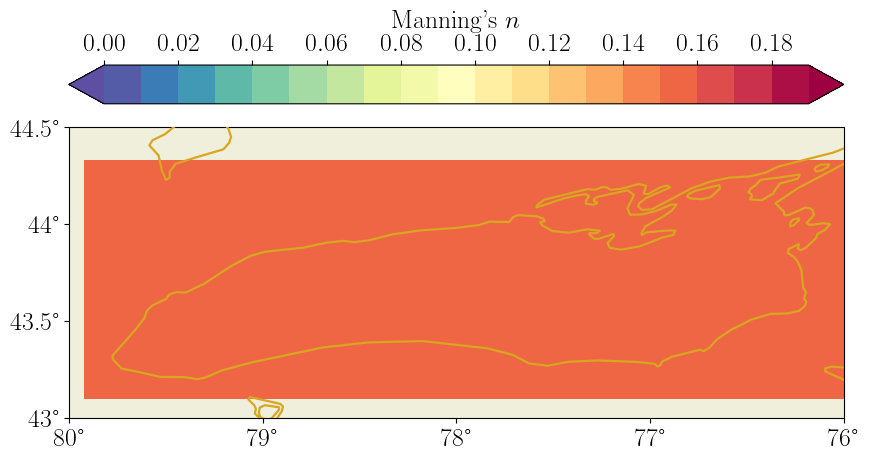

In [18]:
plot_contours_vmag(r'coeff_contour')